### Dataset link: https://archive.ics.uci.edu/ml/datasets/Adult

## Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("adult_data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Performing EDA on Train Data

In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [4]:
len(df.columns)

15

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.shape

(32561, 15)

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='salary', ylabel='count'>

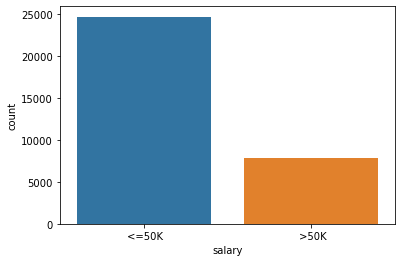

In [8]:
sns.countplot(x='salary',data=df )

In [9]:
df["salary"].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [10]:
print(f"<= 50k : {round(24720 /32561 * 100 , 2)}")
print(f"> 50k : {round(7841 /32561 * 100 , 2)}")

<= 50k : 75.92
> 50k : 24.08


In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [12]:
numerical = [i for i in df.columns if df[i].dtypes != "O"]
numerical

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [13]:
for i in numerical:
    print(f" {i}  :  {len(df[i].unique())}")

 age  :  73
 fnlwgt  :  21648
 education-num  :  16
 capital-gain  :  119
 capital-loss  :  92
 hours-per-week  :  94


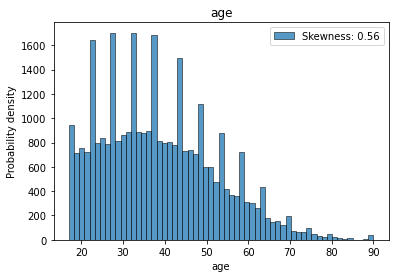

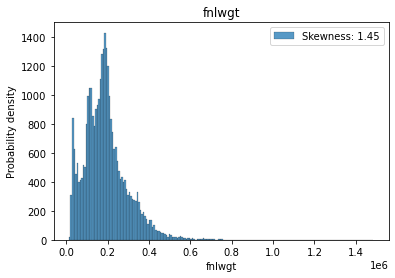

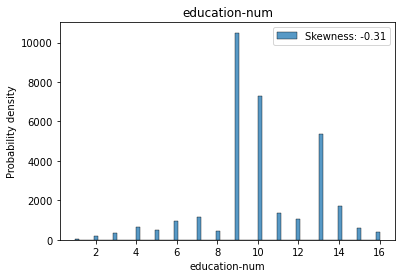

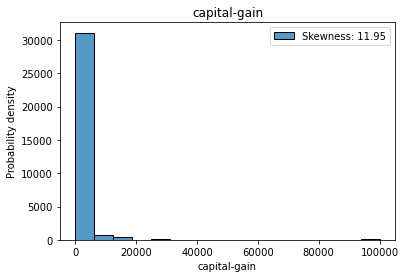

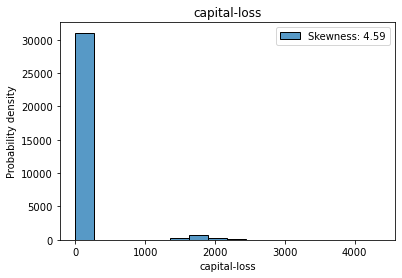

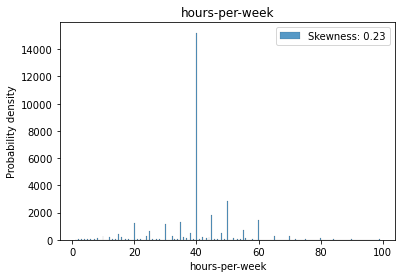

In [14]:
for feature in numerical:
    bar = sns.histplot(df[feature] , kde_kws = {'bw' : 1})
    bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

In [15]:
df["age"] = np.log(df["age"])
df["fnlwgt"] = np.log(df["fnlwgt"])

In [16]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,3.663562,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,3.912023,Self-emp-not-inc,11.330336,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3.637586,Private,12.281393,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3.970292,Private,12.366153,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,3.332205,Private,12.732011,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [18]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  9
 education  :  16
 marital-status  :  7
 occupation  :  15
 relationship  :  6
 race  :  5
 sex  :  2
 native-country  :  42
 salary  :  2


In [19]:
for feature in  categorical:
    print(df[feature].value_counts()) 
    print("\n \n ")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 
 
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

 
 
 Prof-specialty       4140
 Craft-repair         4099
 

In [20]:
print(f"workclass : {round(1836 / 32561 , 4) *100}%")
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native-country : {round(583 / 32561 , 4) *100}%")

workclass : 5.64%
occupation : 5.66%
native-country : 1.79%


In [21]:
df["occupation"].mode()

0     Prof-specialty
dtype: object

In [22]:
df["workclass"].mode()

0     Private
dtype: object

In [23]:
df["native-country"].mode()

0     United-States
dtype: object

In [24]:
df["workclass"] = df['workclass'].str.replace('?', 'Private' )
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' )
df['native-country'] = df['native-country'].str.replace('?', 'United-States' )

<ipython-input-24-d35999431f00>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["workclass"] = df['workclass'].str.replace('?', 'Private' )
<ipython-input-24-d35999431f00>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' )
<ipython-input-24-d35999431f00>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['native-country'] = df['native-country'].str.replace('?', 'United-States' )


In [25]:
df["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df["education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

In [26]:
df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)

In [27]:
df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)

In [28]:
df["salary"] = df["salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

In [29]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,3.663562,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,3.912023,Self-emp-not-inc,11.330336,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,3.637586,Private,12.281393,HS-grad,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3.970292,Private,12.366153,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,3.332205,Private,12.732011,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [30]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  8
 education  :  6
 marital-status  :  3
 occupation  :  14
 relationship  :  6
 race  :  5
 sex  :  2
 native-country  :  41
 salary  :  2


In [31]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' school', ' Masters', ' higher',
       ' Doctorate'], dtype=object)

<AxesSubplot:>

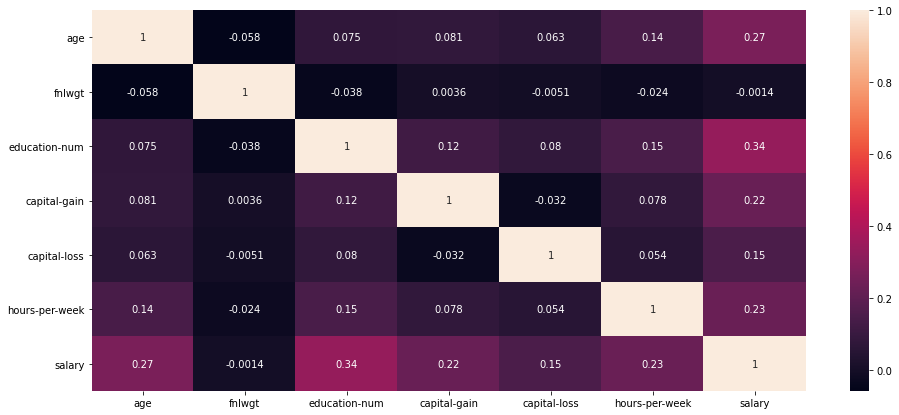

In [32]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True)

## Encoding Categorical Data

In [33]:
from sklearn.preprocessing import OneHotEncoder
df=pd.get_dummies(df)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,3.663562,11.258240,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.912023,11.330336,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.637586,12.281393,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3.970292,12.366153,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.332205,12.732011,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ higher', 'education_ school',
       'marital-status_ Never-married', 'marital-status_ married',
       'marital-status_ other', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-sup

In [35]:
df.shape

(32561, 92)

## Loading Test data

In [36]:
df_test = pd.read_csv("adult_test.csv")
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [37]:
for feature in  categorical:
    print(df_test[feature].value_counts()) 
    print("\n \n ")

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64

 
 
 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: education, dtype: int64

 
 
 Married-civ-spouse       7403
 Never-married            5434
 Divorced                 2190
 Widowed                   525
 Separated                 505
 Married-spouse-absent     210
 Married-AF-spouse          14
Name: marital-status, dtype: int64

 
 
 Prof-specialty       2032
 Exec-managerial      2020
 Craft-repair         20

In [38]:
df_test["age"] = np.log(df_test["age"])
df_test["fnlwgt"] = np.log(df_test["fnlwgt"])

In [39]:
df_test["workclass"] = df_test['workclass'].str.replace('?', 'Private' )
df_test['occupation'] = df_test['occupation'].str.replace('?', 'Prof-specialty' )
df_test['native-country'] = df_test['native-country'].str.replace('?', 'United-States' )

<ipython-input-39-536d197b84e4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_test["workclass"] = df_test['workclass'].str.replace('?', 'Private' )
<ipython-input-39-536d197b84e4>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_test['occupation'] = df_test['occupation'].str.replace('?', 'Prof-specialty' )
<ipython-input-39-536d197b84e4>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_test['native-country'] = df_test['native-country'].str.replace('?', 'United-States' )


In [40]:
df_test["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df_test["education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)


In [41]:
df_test['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df_test['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)

In [42]:
df_test["salary"] = df_test["salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

In [43]:
from sklearn.preprocessing import OneHotEncoder
df_test=pd.get_dummies(df_test)
df_test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,3.218876,12.331833,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.637586,11.405496,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.332205,12.727693,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3.784190,11.984946,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.890372,11.547298,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
df_test.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad',
       'education_ Masters', 'education_ higher', 'education_ school',
       'marital-status_ Never-married', 'marital-status_ married',
       'marital-status_ other', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-sup

In [45]:
df_test.shape

(16281, 91)

In [46]:
x_train=df.drop(columns=['salary','native-country_ Holand-Netherlands'],axis=1)
y_train=df['salary']

In [47]:
x_test = df_test.drop(columns=['salary'],axis=1)
y_test = df_test["salary"]

## Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Model Evaluation

## Logistic Regression

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
accuracy_score(y_test, prediction)

0.8090412136846631

In [51]:
f1_score(y_test, prediction)

0.6754358492535756

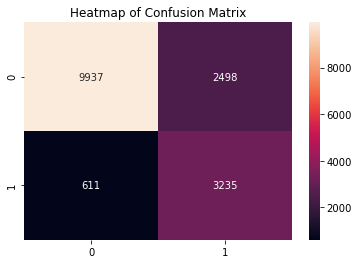

In [52]:
cm = confusion_matrix(y_test, prediction )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [53]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     12435
           1       0.56      0.84      0.68      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.82      0.77     16281
weighted avg       0.85      0.81      0.82     16281



## Decision Tree Classifier

In [54]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(max_depth=10,criterion='entropy',random_state=0)
clf.fit(x_train,y_train)
prediction=clf.predict(x_test)
accuracy_score(y_test,prediction)

0.8606965174129353

In [55]:
f1_score(y_test, prediction)

0.6587421005115859

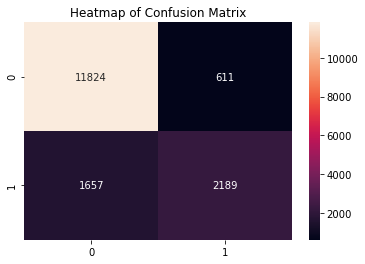

In [56]:
cm = confusion_matrix(y_test, prediction )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [57]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     12435
           1       0.78      0.57      0.66      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.76      0.79     16281
weighted avg       0.85      0.86      0.85     16281



## Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8495792641729624

In [59]:
f1_score(y_test, y_pred)

0.6529686835765907

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.72      0.60      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.78     16281
weighted avg       0.84      0.85      0.84     16281



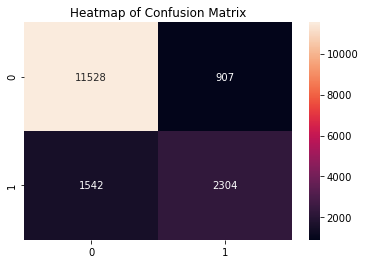

In [61]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

## Hyperparameter tuning with Random Forest Classifier

In [62]:
params={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':[1,2,3],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf': [1,2,3,4],
              }

In [63]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3 ,random_state = 23)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=20,
                                                    random_state=51),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   random_state=23, scoring='roc_auc', verbose=3)

In [64]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': False}

In [65]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       max_features=3, min_samples_leaf=2, n_estimators=200,
                       random_state=51)

In [66]:
rf_classifier = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=10, max_features=3,
                       min_samples_leaf=2, n_estimators=200, random_state=51)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.7732940237086174

In [67]:
f1_score(y_test, y_pred)

0.6459472422062351

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     12435
           1       0.51      0.88      0.65      3846

    accuracy                           0.77     16281
   macro avg       0.73      0.81      0.74     16281
weighted avg       0.85      0.77      0.79     16281



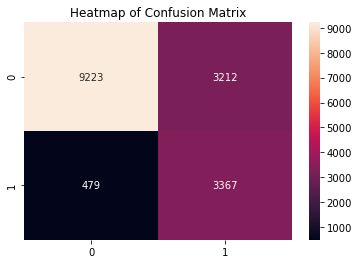

In [69]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

## Observations

The optimized model’s accuracy and F-score on testing data on random forest classifier are 77% and 64.5% respectively.